In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

df = pd.read_csv('loan_train.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'] ,axis='columns', inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [2]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [3]:
df.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')

In [4]:
X = df[['Principal', 'terms', 'age', 'education', 'Gender']].values
X[0:5]

array([[1000, 30, 45, 'High School or Below', 'male'],
       [1000, 30, 33, 'Bechalor', 'female'],
       [1000, 15, 27, 'college', 'male'],
       [1000, 30, 28, 'college', 'female'],
       [1000, 30, 29, 'college', 'male']], dtype=object)

In [5]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [6]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [7]:
Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,1,0,0
1,1000,30,33,1,1,0,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,0,0,0,1
4,1000,30,29,0,0,0,0,1


In [8]:
X = Feature.values
#Normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
y = df['loan_status'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [10]:
result=[]

# Classification with K_NN

The best accuracy was with 0.8 with k= 13


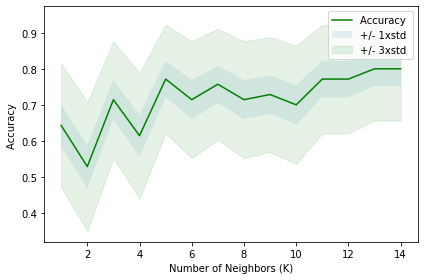

In [11]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

#Visualize the best accuracy in a plot
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()


In [12]:
# Building the model again, using k=13
from sklearn.neighbors import KNeighborsClassifier
k = 13
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhat = kNN_model.predict(X_test)
#Compare prediction to the actual value
print(yhat[0:5])
print(y_test[0:5])
#Evaluate the model
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))
result.append(["KNN",jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'),f1_score(y_test, yhat, average='weighted'),None])


['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Jaccard_score:  0.7971014492753623
F1_score:  0.7237903225806451


# Classification Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dec_tree.fit(X_train,y_train)
pred_tree = dec_tree.predict(X_test)
#Compare prediction to the actual value
print(pred_tree[0:5])
print(y_test[0:5])
#Evaluate the model
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))
result.append(["Decision tree",jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'),f1_score(y_test, yhat, average='weighted'),None])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Jaccard_score:  0.7971014492753623
F1_score:  0.7237903225806451


# Classification Support Vector Machine

In [14]:
from sklearn import svm

model = svm.SVC(kernel='rbf', probability = True)
model.fit(X_train, y_train) 
yhat = model.predict(X_test)
yhat_prob = model.predict_proba(X_test)
#Compare prediction to the actual value
print(yhat[0:5])
print(y_test[0:5])
#Evaluate the model
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))
print("log_loss: ", log_loss(y_test, yhat_prob))
result.append(["SVM",jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'),f1_score(y_test, yhat, average='weighted'),log_loss(y_test, yhat_prob)])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Jaccard_score:  0.7857142857142857
F1_score:  0.6914285714285714
log_loss:  0.5259060918574991


# Classification with Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)
print(yhat_prob[0:5])


[[0.4351017  0.5648983 ]
 [0.38272792 0.61727208]
 [0.40002151 0.59997849]
 [0.44830788 0.55169212]
 [0.42327858 0.57672142]]


In [16]:
print("Jaccard_score: ", jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'))
print("F1_score: ", f1_score(y_test, yhat, average='weighted'))
print("log_loss: ", log_loss(y_test, yhat_prob))
result.append(["logistic regression",jaccard_score(y_test, yhat, pos_label = 'PAIDOFF'),f1_score(y_test, yhat, average='weighted'),log_loss(y_test, yhat_prob)])

Jaccard_score:  0.7857142857142857
F1_score:  0.6914285714285714
log_loss:  0.6025211110710316


# Result

In [17]:
results=pd.DataFrame(result,columns=["Algorithm","Jaccard","F1-score","LogLoss"])
results

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.797101,0.723790,NaN
1,Decision tree,0.797101,0.723790,NaN
2,SVM,0.785714,0.691429,0.525906
3,logistic regression,0.785714,0.691429,0.602521
